In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None))
pi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_pi.csv',header= None))
dpi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_dpi.csv',header= None))
V = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_V.csv',header = None))
#df_pions = np.hstack((pi,dpi,V))
np.random.shuffle(df_pions)
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:16]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:16]), df_pions[-1000:,-1]


In [3]:
unshuffled_potential_values = df_pions[:,-1].copy()
shufffled_potential_values = unshuffled_potential_values.copy()
np.random.shuffle(shufffled_potential_values)
random_mean_absolute_errro = np.mean(abs(unshuffled_potential_values-shufffled_potential_values))
print('Random mae = ',random_mean_absolute_errro)
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))

Random mae =  0.6973552443247872
Mean Potential Value =  1.3989895398186205


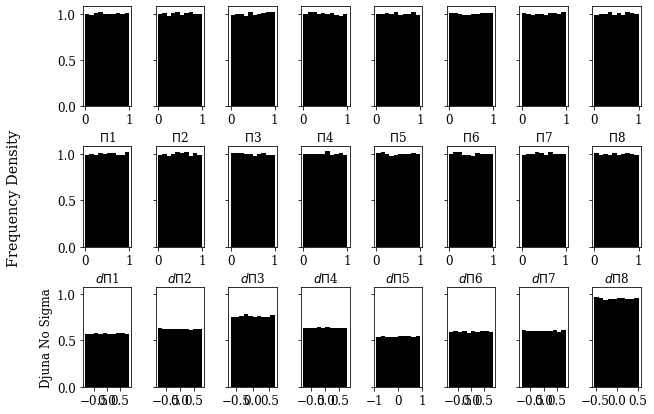

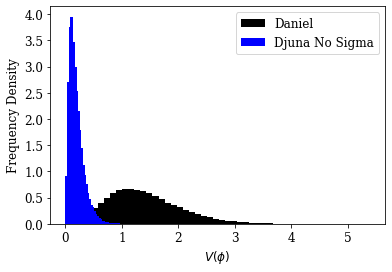

In [33]:
fig , ax = plt.subplots(3,8,sharey= True, figsize = (10,7))
plt.subplots_adjust(hspace= 0.4,wspace= 0.5)
for i in range(8):
    ax[0,i].hist(pi[:,i], density = True, color = 'black') 
    ax[1,i].hist(dpi[:,i],density = True, color = 'black')
    ax[2,i].hist(df_pions[:,i],density = True,color = 'black')
    ax[0,i].set_xlabel(r'$\Pi$'+str(i+1))
    ax[1,i].set_xlabel(r'$d\Pi$'+str(i+1))
ax[2,0].set_ylabel('Djuna No Sigma')
fig.supylabel('Frequency Density')


fig_2 = plt.figure()
plt.hist(df_pions[:,-1],density= True, bins = 50, color = 'black',label=  'Daniel')
plt.hist(abs(V),density= True, bins = 50, color = 'blue',label= 'Djuna No Sigma')
plt.xlabel('$V(\phi)$')
plt.ylabel('Frequency Density')
plt.legend()
fig.savefig('../Figures/PionsDVD.png',dpi = 200)
fig_2.savefig('../Figures/potentialDVD.png',dpi = 200)

In [5]:
epsilon_vdiff = pd.read_csv('../Training_Data/symetric_training_data_epsilon_and_vdiff.csv')
epsilon_vdiff.columns


Index(['Unnamed: 0', 'epsilon', 'SOdiff', 'SUdiff'], dtype='object')

(0.0005623413251903491, 1)

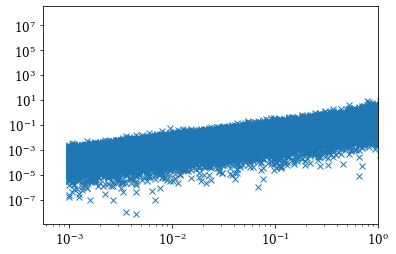

In [6]:
plt.loglog(epsilon_vdiff['epsilon'],epsilon_vdiff['SOdiff'],linestyle = '',marker ='x')
plt.xlim(right = 1)

In [10]:
opt = keras.optimizers.Adam(learning_rate= 0.01, beta_1 = 0.881, beta_2= 0.99)


In [11]:

model = models.Sequential()
model.add(layers.Dense(512,activation= 'relu', input_shape = (train_x.shape[1],)))
model.add(layers.Dense(512,activation= 'relu'))
model.add(layers.Dense(512,activation= 'relu'))
model.add(layers.Dense(512,activation= 'relu'))
model.add(layers.Dense(512,activation= 'relu'))
model.add(layers.Dense(512,activation= 'relu'))
model.add(layers.Dense(1))
model.compile(optimizer = opt,loss = 'mse', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

2021-11-21 17:36:46.591502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 17:36:46.595318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 17:36:46.595721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 17:36:46.596329: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
epoch_num = 50

In [13]:

model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 32 , epochs = epoch_num)

2021-11-21 17:36:48.263505: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
3094/3094 [==============================] - 6s 2ms/step - loss: 3.8739 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 6.8298 - val_loss: 0.0030 - val_mean_absolute_error: 0.0464 - val_mean_absolute_percentage_error: 5.0286
Epoch 2/50
3094/3094 [==============================] - 5s 2ms/step - loss: 7.2209e-04 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 1.5592 - val_loss: 0.0026 - val_mean_absolute_error: 0.0443 - val_mean_absolute_percentage_error: 3.3144
Epoch 3/50
3094/3094 [==============================] - 6s 2ms/step - loss: 3.4296e-04 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.1497 - val_loss: 0.0015 - val_mean_absolute_error: 0.0335 - val_mean_absolute_percentage_error: 2.3582
Epoch 4/50
3094/3094 [==============================] - 6s 2ms/step - loss: 3.0933e-04 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 1.0208 - val_loss: 0.0012 - val_mean_absolute_error: 0.0289 - val_mean_absolute_perce

In [15]:
history = model.history


In [16]:
epochs = np.arange(1,epoch_num+1)
mae = history.history['mean_absolute_error']
mape = history.history['mean_absolute_percentage_error']
val_mae = np.array(history.history['val_mean_absolute_error'])
val_mape = np.array(history.history['val_mean_absolute_percentage_error'])
loss = history.history['loss']
val_loss = np.array(history.history['val_loss'])

In [17]:

val_mae_smooth = cf.exponetial_smoothing(val_mae,0.4)
val_loss_smooth = cf.exponetial_smoothing(val_loss,0.4)
val_mape_smooth = cf.exponetial_smoothing(val_mape,0.4)


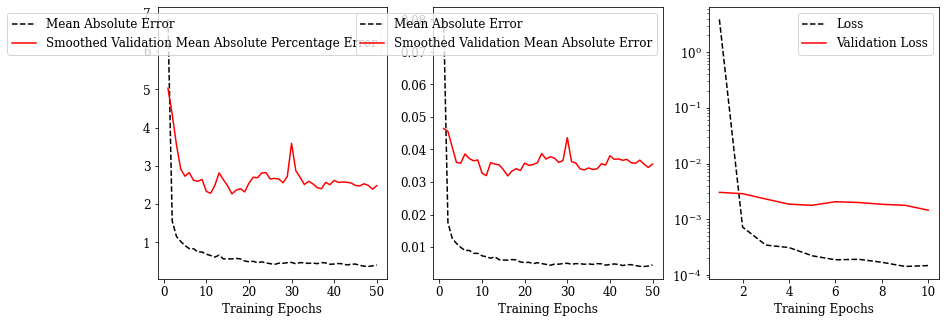

In [18]:
matplotlib.rcParams.update({'legend.fontsize': 12})
fig_3, axs  = plt.subplots(1,3, figsize= (14,5))
axs[0].plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Error')
axs[0].plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Percentage Error')
axs[0].set_xlabel('Training Epochs')
#axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(epochs,mae, c = 'black',linestyle = '--',label = 'Mean Absolute Error')
axs[1].plot(epochs,val_mae_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Error')
axs[1].set_xlabel('Training Epochs')
#axs[1].set_yscale('log')
axs[1].legend()

cut = 10
axs[2].plot(epochs[:cut],loss[:cut], label = 'Loss',c = 'black',linestyle = '--')
axs[2].plot(epochs[:cut],val_loss_smooth[:cut], label = 'Validation Loss',c = 'red')
axs[2].set_xlabel('Training Epochs')
axs[2].set_yscale('log')
axs[2].legend()

In [19]:
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))
print('')

Mean Potential Value =  1.3989895398186205



In [20]:
fig.savefig('../Figures/Pions.png',dpi = 200)
fig_2.savefig('../Figures/potential.png',dpi = 200)
fig_3.savefig('../Figures/Inital_poc.png',dpi = 200)